In [1]:
import matplotlib.colors as mcolors
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('dataset.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [3]:
df.shape

(43400, 12)

### Missing values

In [4]:
df.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

#### For smoking status setting NaN values as 'unknown'

In [5]:
df['smoking_status'].unique()

array([nan, 'never smoked', 'formerly smoked', 'smokes'], dtype=object)

In [6]:
df['smoking_status'].fillna('unknown',inplace=True)
df.isnull().sum()

id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                  1462
smoking_status          0
stroke                  0
dtype: int64

#### For bmi: because 1462 is far smaller than the length of our dataset (43400), we can drop thos observations

In [7]:
df.dropna(inplace=True)
df.shape

(41938, 12)

### Processing categorical variables

In [8]:
encoder = LabelEncoder()
df['gender'] = encoder.fit_transform(df['gender'])
gender = {index : label for index, label in enumerate(encoder.classes_)}
gender

{0: 'Female', 1: 'Male', 2: 'Other'}

In [9]:
df['ever_married'].unique()

array(['No', 'Yes'], dtype=object)

In [10]:
df['ever_married'] = encoder.fit_transform(df['ever_married'])
ever_married = {index : label for index, label in enumerate(encoder.classes_)}
ever_married

{0: 'No', 1: 'Yes'}

In [11]:
df['Residence_type'].unique()

array(['Rural', 'Urban'], dtype=object)

In [12]:
df['Residence_type'] = encoder.fit_transform(df['Residence_type'])
res_type = {index : label for index, label in enumerate(encoder.classes_)}
res_type

{0: 'Rural', 1: 'Urban'}

In [13]:
df['smoking_status'] = encoder.fit_transform(df['smoking_status'])
smoking_status = {index : label for index, label in enumerate(encoder.classes_)}
smoking_status

{0: 'formerly smoked', 1: 'never smoked', 2: 'smokes', 3: 'unknown'}

In [14]:
df['work_type'].unique()

array(['children', 'Private', 'Never_worked', 'Self-employed', 'Govt_job'],
      dtype=object)

In [15]:
df['work_type'] = encoder.fit_transform(df['work_type'])
work_type = {index : label for index, label in enumerate(encoder.classes_)}
work_type

{0: 'Govt_job',
 1: 'Never_worked',
 2: 'Private',
 3: 'Self-employed',
 4: 'children'}

Dropping id because it does not hold valid info for the model

In [16]:
df.drop('id',axis=1,inplace=True)

In [17]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,3.0,0,0,0,4,0,95.12,18.0,3,0
1,1,58.0,1,0,1,2,1,87.96,39.2,1,0
2,0,8.0,0,0,0,2,1,110.89,17.6,3,0
3,0,70.0,0,0,1,2,0,69.04,35.9,0,0
4,1,14.0,0,0,0,1,0,161.28,19.1,3,0


#### Defining features and target

In [18]:
X=df.drop('stroke',axis=1)
y=df['stroke']

#### Train test split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

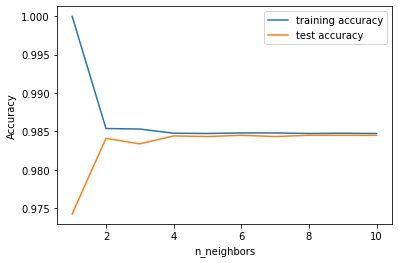

In [20]:
training_accuracy = [] 
test_accuracy = []
# try n_neighbors from 1 to 10 
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors) 
    clf.fit(X_train, y_train)
    # record training set accuracy 
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy 
    test_accuracy.append(clf.score(X_test, y_test))
    
    
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy") 
plt.plot(neighbors_settings, test_accuracy, label="test accuracy") 
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()